# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 09 vs Chr 09 Inversion

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 1

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_1L.bmp',
   'D:\\Users\

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name

{'chr_09': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_9L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_21L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_3L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_7L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\W07391-9p12q_9L.bmp',
   'D:\\Users\\Chuan\\Document

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_09': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_18L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_09\\193002-9p12q13_19L.bmp',
  'D:\\Users\\Chuan\\Docume

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_09', 'chr_9_inversion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  1
chr_09
   Train: 
        193002-9p12q13_12L.bmp
        193002-9p12q13_13L.bmp
        193002-9p12q13_14L.bmp
        193002-9p12q13_15L.bmp
        193002-9p12q13_16L.bmp
        193002-9p12q13_17L.bmp
        193002-9p12q13_18L.bmp
        193002-9p12q13_19L.bmp
        193002-9p12q13_1L.bmp
        193002-9p12q13_24L.bmp
        193002-9p12q13_3L.bmp
        193002-9p12q13_4L.bmp
        193002-9p12q13_6L.bmp
        193002-9p12q13_8L.bmp
        193002-9p12q13_9L.bmp
        W07391-9p12q_10L.bmp
        W07391-9p12q_11L.bmp
        W07391-9p12q_13L.bmp
        W07391-9p12q_14L.bmp
        W07391-9p12q_15L.bmp
        W07391-9p12q_16L.bmp
        W07391-9p12q_17L.bmp
        W07391-9p12q_18L.bmp
        W07391-9p12q_20L.bmp
        W07391-9p12q_21L.bmp
        W07391-9p12q_22L.bmp
        W07391-9p12q_3L.bmp
        W07391-9p12q_5L.bmp
        W07391-9p12q_6L.bmp
        W07391-9p12q_7L.bmp
        W07391-9p12q_9L.bmp
        W15206-_9p12q_11L.bmp
        W15206-_9

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_09': 0, 
               'chr_9_inversion': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_09',
                1: 'chr_9_inversion'
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [23]:
len(X_train)

346

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
start = time.time()

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
6/6 [==============================] - 5s 481ms/step - loss: 564.8661 - accuracy: 0.4624 - val_loss: 3.4451 - val_accuracy: 0.5977
Epoch 2/500
6/6 [==============================] - 1s 112ms/step - loss: 1.8182 - accuracy: 0.4971 - val_loss: 0.4821 - val_accuracy: 0.6897
Epoch 3/500
6/6 [==============================] - 1s 136ms/step - loss: 1.0926 - accuracy: 0.7572 - val_loss: 0.4830 - val_accuracy: 0.7241
Epoch 4/500
6/6 [==============================] - 1s 117ms/step - loss: 0.5790 - accuracy: 0.8613 - val_loss: 0.5326 - val_accuracy: 0.7701
Epoch 5/500
6/6 [==============================] - 1s 110ms/step - loss: 0.4149 - accuracy: 0.8353 - val_loss: 0.4111 - val_accuracy: 0.8621
Epoch 6/500
6/6 [==============================] - 1s 115ms/step - loss: 0.3003 - accuracy: 0.9220 - val_loss: 2.4914 - val_accuracy: 0.5977
Epoch 7/500
6/6 [==============================] - 1s 113ms/step - loss: 0.6730 - accuracy: 0.8468 - val_loss: 0.3123 - val_accuracy: 0.8506
Epoch 8/500

Epoch 58/500
6/6 [==============================] - 1s 112ms/step - loss: 1.6078e-05 - accuracy: 1.0000 - val_loss: 0.4735 - val_accuracy: 0.9195
Epoch 59/500
6/6 [==============================] - 1s 114ms/step - loss: 1.5306e-05 - accuracy: 1.0000 - val_loss: 0.4751 - val_accuracy: 0.9195
Epoch 60/500
6/6 [==============================] - 1s 114ms/step - loss: 1.4656e-05 - accuracy: 1.0000 - val_loss: 0.4766 - val_accuracy: 0.9195
Epoch 61/500
6/6 [==============================] - 1s 117ms/step - loss: 1.3972e-05 - accuracy: 1.0000 - val_loss: 0.4784 - val_accuracy: 0.9195
Epoch 62/500
6/6 [==============================] - 1s 116ms/step - loss: 1.3389e-05 - accuracy: 1.0000 - val_loss: 0.4810 - val_accuracy: 0.9195
Epoch 63/500
6/6 [==============================] - 1s 114ms/step - loss: 1.2895e-05 - accuracy: 1.0000 - val_loss: 0.4825 - val_accuracy: 0.9195
Epoch 64/500
6/6 [==============================] - 1s 117ms/step - loss: 1.2303e-05 - accuracy: 1.0000 - val_loss: 0.4829 -

6/6 [==============================] - 1s 113ms/step - loss: 2.5351e-06 - accuracy: 1.0000 - val_loss: 0.5220 - val_accuracy: 0.9310
Epoch 115/500
6/6 [==============================] - 1s 118ms/step - loss: 2.4744e-06 - accuracy: 1.0000 - val_loss: 0.5226 - val_accuracy: 0.9310
Epoch 116/500
6/6 [==============================] - 1s 118ms/step - loss: 2.4217e-06 - accuracy: 1.0000 - val_loss: 0.5232 - val_accuracy: 0.9310
Epoch 117/500
6/6 [==============================] - 1s 115ms/step - loss: 2.3625e-06 - accuracy: 1.0000 - val_loss: 0.5242 - val_accuracy: 0.9310
Epoch 118/500
6/6 [==============================] - 1s 116ms/step - loss: 2.3053e-06 - accuracy: 1.0000 - val_loss: 0.5251 - val_accuracy: 0.9310
Epoch 119/500
6/6 [==============================] - 1s 115ms/step - loss: 2.2550e-06 - accuracy: 1.0000 - val_loss: 0.5253 - val_accuracy: 0.9310
Epoch 120/500
6/6 [==============================] - 1s 115ms/step - loss: 2.2029e-06 - accuracy: 1.0000 - val_loss: 0.5258 - val_ac

Epoch 170/500
6/6 [==============================] - 1s 115ms/step - loss: 8.9028e-07 - accuracy: 1.0000 - val_loss: 0.5466 - val_accuracy: 0.9310
Epoch 171/500
6/6 [==============================] - 1s 111ms/step - loss: 8.7925e-07 - accuracy: 1.0000 - val_loss: 0.5470 - val_accuracy: 0.9310
Epoch 172/500
6/6 [==============================] - 1s 115ms/step - loss: 8.6306e-07 - accuracy: 1.0000 - val_loss: 0.5474 - val_accuracy: 0.9310
Epoch 173/500
6/6 [==============================] - 1s 113ms/step - loss: 8.5479e-07 - accuracy: 1.0000 - val_loss: 0.5474 - val_accuracy: 0.9310
Epoch 174/500
6/6 [==============================] - 1s 117ms/step - loss: 8.4066e-07 - accuracy: 1.0000 - val_loss: 0.5477 - val_accuracy: 0.9310
Epoch 175/500
6/6 [==============================] - 1s 112ms/step - loss: 8.2654e-07 - accuracy: 1.0000 - val_loss: 0.5479 - val_accuracy: 0.9310
Epoch 176/500
6/6 [==============================] - 1s 114ms/step - loss: 8.1620e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 226/500
6/6 [==============================] - 1s 149ms/step - loss: 4.2343e-07 - accuracy: 1.0000 - val_loss: 0.5687 - val_accuracy: 0.9310
Epoch 227/500
6/6 [==============================] - 1s 115ms/step - loss: 4.2068e-07 - accuracy: 1.0000 - val_loss: 0.5692 - val_accuracy: 0.9310
Epoch 228/500
6/6 [==============================] - 1s 114ms/step - loss: 4.1516e-07 - accuracy: 1.0000 - val_loss: 0.5691 - val_accuracy: 0.9310
Epoch 229/500
6/6 [==============================] - 1s 114ms/step - loss: 4.1241e-07 - accuracy: 1.0000 - val_loss: 0.5693 - val_accuracy: 0.9310
Epoch 230/500
6/6 [==============================] - 1s 114ms/step - loss: 4.0724e-07 - accuracy: 1.0000 - val_loss: 0.5698 - val_accuracy: 0.9310
Epoch 231/500
6/6 [==============================] - 1s 115ms/step - loss: 4.0207e-07 - accuracy: 1.0000 - val_loss: 0.5703 - val_accuracy: 0.9310
Epoch 232/500
6/6 [==============================] - 1s 116ms/step - loss: 3.9690e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 282/500
6/6 [==============================] - 1s 113ms/step - loss: 2.4944e-07 - accuracy: 1.0000 - val_loss: 0.5871 - val_accuracy: 0.9195
Epoch 283/500
6/6 [==============================] - 1s 116ms/step - loss: 2.4807e-07 - accuracy: 1.0000 - val_loss: 0.5874 - val_accuracy: 0.9195
Epoch 284/500
6/6 [==============================] - 1s 115ms/step - loss: 2.4703e-07 - accuracy: 1.0000 - val_loss: 0.5877 - val_accuracy: 0.9195
Epoch 285/500
6/6 [==============================] - 1s 117ms/step - loss: 2.4393e-07 - accuracy: 1.0000 - val_loss: 0.5881 - val_accuracy: 0.9195
Epoch 286/500
6/6 [==============================] - 1s 116ms/step - loss: 2.4221e-07 - accuracy: 1.0000 - val_loss: 0.5883 - val_accuracy: 0.9195
Epoch 287/500
6/6 [==============================] - 1s 116ms/step - loss: 2.4014e-07 - accuracy: 1.0000 - val_loss: 0.5883 - val_accuracy: 0.9195
Epoch 288/500
6/6 [==============================] - 1s 113ms/step - loss: 2.3842e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 338/500
6/6 [==============================] - 1s 112ms/step - loss: 1.6090e-07 - accuracy: 1.0000 - val_loss: 0.6047 - val_accuracy: 0.9195
Epoch 339/500
6/6 [==============================] - 1s 112ms/step - loss: 1.5986e-07 - accuracy: 1.0000 - val_loss: 0.6049 - val_accuracy: 0.9195
Epoch 340/500
6/6 [==============================] - 1s 122ms/step - loss: 1.5918e-07 - accuracy: 1.0000 - val_loss: 0.6051 - val_accuracy: 0.9195
Epoch 341/500
6/6 [==============================] - 1s 120ms/step - loss: 1.5780e-07 - accuracy: 1.0000 - val_loss: 0.6054 - val_accuracy: 0.9195
Epoch 342/500
6/6 [==============================] - 1s 116ms/step - loss: 1.5711e-07 - accuracy: 1.0000 - val_loss: 0.6056 - val_accuracy: 0.9195
Epoch 343/500
6/6 [==============================] - 1s 129ms/step - loss: 1.5573e-07 - accuracy: 1.0000 - val_loss: 0.6059 - val_accuracy: 0.9195
Epoch 344/500
6/6 [==============================] - 1s 119ms/step - loss: 1.5504e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 394/500
6/6 [==============================] - 1s 139ms/step - loss: 1.1163e-07 - accuracy: 1.0000 - val_loss: 0.6205 - val_accuracy: 0.9195
Epoch 395/500
6/6 [==============================] - 1s 122ms/step - loss: 1.1060e-07 - accuracy: 1.0000 - val_loss: 0.6208 - val_accuracy: 0.9195
Epoch 396/500
6/6 [==============================] - 1s 125ms/step - loss: 1.0956e-07 - accuracy: 1.0000 - val_loss: 0.6211 - val_accuracy: 0.9195
Epoch 397/500
6/6 [==============================] - 1s 114ms/step - loss: 1.0956e-07 - accuracy: 1.0000 - val_loss: 0.6214 - val_accuracy: 0.9080
Epoch 398/500
6/6 [==============================] - 1s 124ms/step - loss: 1.0922e-07 - accuracy: 1.0000 - val_loss: 0.6215 - val_accuracy: 0.9080
Epoch 399/500
6/6 [==============================] - 1s 116ms/step - loss: 1.0887e-07 - accuracy: 1.0000 - val_loss: 0.6218 - val_accuracy: 0.9080
Epoch 400/500
6/6 [==============================] - 1s 122ms/step - loss: 1.0818e-07 - accuracy: 1.0000 - val_loss: 0

Epoch 450/500
6/6 [==============================] - 1s 114ms/step - loss: 7.9932e-08 - accuracy: 1.0000 - val_loss: 0.6359 - val_accuracy: 0.9080
Epoch 451/500
6/6 [==============================] - 1s 114ms/step - loss: 7.9932e-08 - accuracy: 1.0000 - val_loss: 0.6360 - val_accuracy: 0.9080
Epoch 452/500
6/6 [==============================] - 1s 114ms/step - loss: 7.9588e-08 - accuracy: 1.0000 - val_loss: 0.6363 - val_accuracy: 0.9080
Epoch 453/500
6/6 [==============================] - 1s 115ms/step - loss: 7.9243e-08 - accuracy: 1.0000 - val_loss: 0.6365 - val_accuracy: 0.9080
Epoch 454/500
6/6 [==============================] - 1s 115ms/step - loss: 7.8899e-08 - accuracy: 1.0000 - val_loss: 0.6367 - val_accuracy: 0.9080
Epoch 455/500
6/6 [==============================] - 1s 113ms/step - loss: 7.7865e-08 - accuracy: 1.0000 - val_loss: 0.6369 - val_accuracy: 0.9080
Epoch 456/500
6/6 [==============================] - 1s 153ms/step - loss: 7.7176e-08 - accuracy: 1.0000 - val_loss: 0

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 9276), started 1:38:16 ago. (Use '!kill 9276' to kill it.)

In [35]:
end = time.time()
print(end - start)

2533.8946990966797


## 3.8 Save the Model

In [36]:
model.save('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_09_cnn_iteration_1\assets


## 3.9 Load the Model

In [37]:
model_reload = keras.models.load_model('saved_model/model_Chr_09_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [38]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.908


In [39]:
len(X_test)

87

In [40]:
y_predict = model_reload.predict(X_test)

In [41]:
len(y_predict)

87

In [42]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [43]:
len(y_predict_filtered)

87

In [44]:
label = ['chr_09', 'chr_9_inversion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [45]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [46]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [47]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [48]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [50]:
y_predict

array([[9.94767547e-01, 4.92231287e-02],
       [9.99768198e-01, 1.01504521e-02],
       [9.99999762e-01, 2.33776027e-05],
       [9.99999642e-01, 2.85238420e-05],
       [9.99999642e-01, 3.16678452e-05],
       [9.99999881e-01, 6.44154861e-05],
       [9.99997139e-01, 5.77330764e-04],
       [9.99999523e-01, 2.08868354e-04],
       [9.99609292e-01, 6.71222582e-02],
       [9.99950886e-01, 1.28241233e-03],
       [9.99999881e-01, 6.39999098e-06],
       [9.99977469e-01, 4.83482523e-04],
       [9.99999762e-01, 8.53876918e-05],
       [9.99986053e-01, 3.12830467e-04],
       [9.69070554e-01, 5.45362055e-01],
       [9.99999881e-01, 1.19360020e-05],
       [9.15438294e-01, 7.11423278e-01],
       [9.99999762e-01, 1.41359696e-05],
       [1.00000000e+00, 1.29277942e-06],
       [9.91543174e-01, 4.27371301e-02],
       [9.99999881e-01, 1.07563110e-05],
       [9.99901652e-01, 1.02019997e-03],
       [1.00000000e+00, 1.94970221e-06],
       [9.99999285e-01, 2.60280995e-05],
       [9.965026

### 3.10.2. Classification Report

In [51]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.91      0.94      0.92        52
chr_9_inversion       0.91      0.86      0.88        35

      micro avg       0.91      0.91      0.91        87
      macro avg       0.91      0.90      0.90        87
   weighted avg       0.91      0.91      0.91        87



### 3.10.3. Confusion Matrix

In [52]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,chr_09,chr_9_inversion
chr_09,49,3
chr_9_inversion,5,30


#### Heat Map

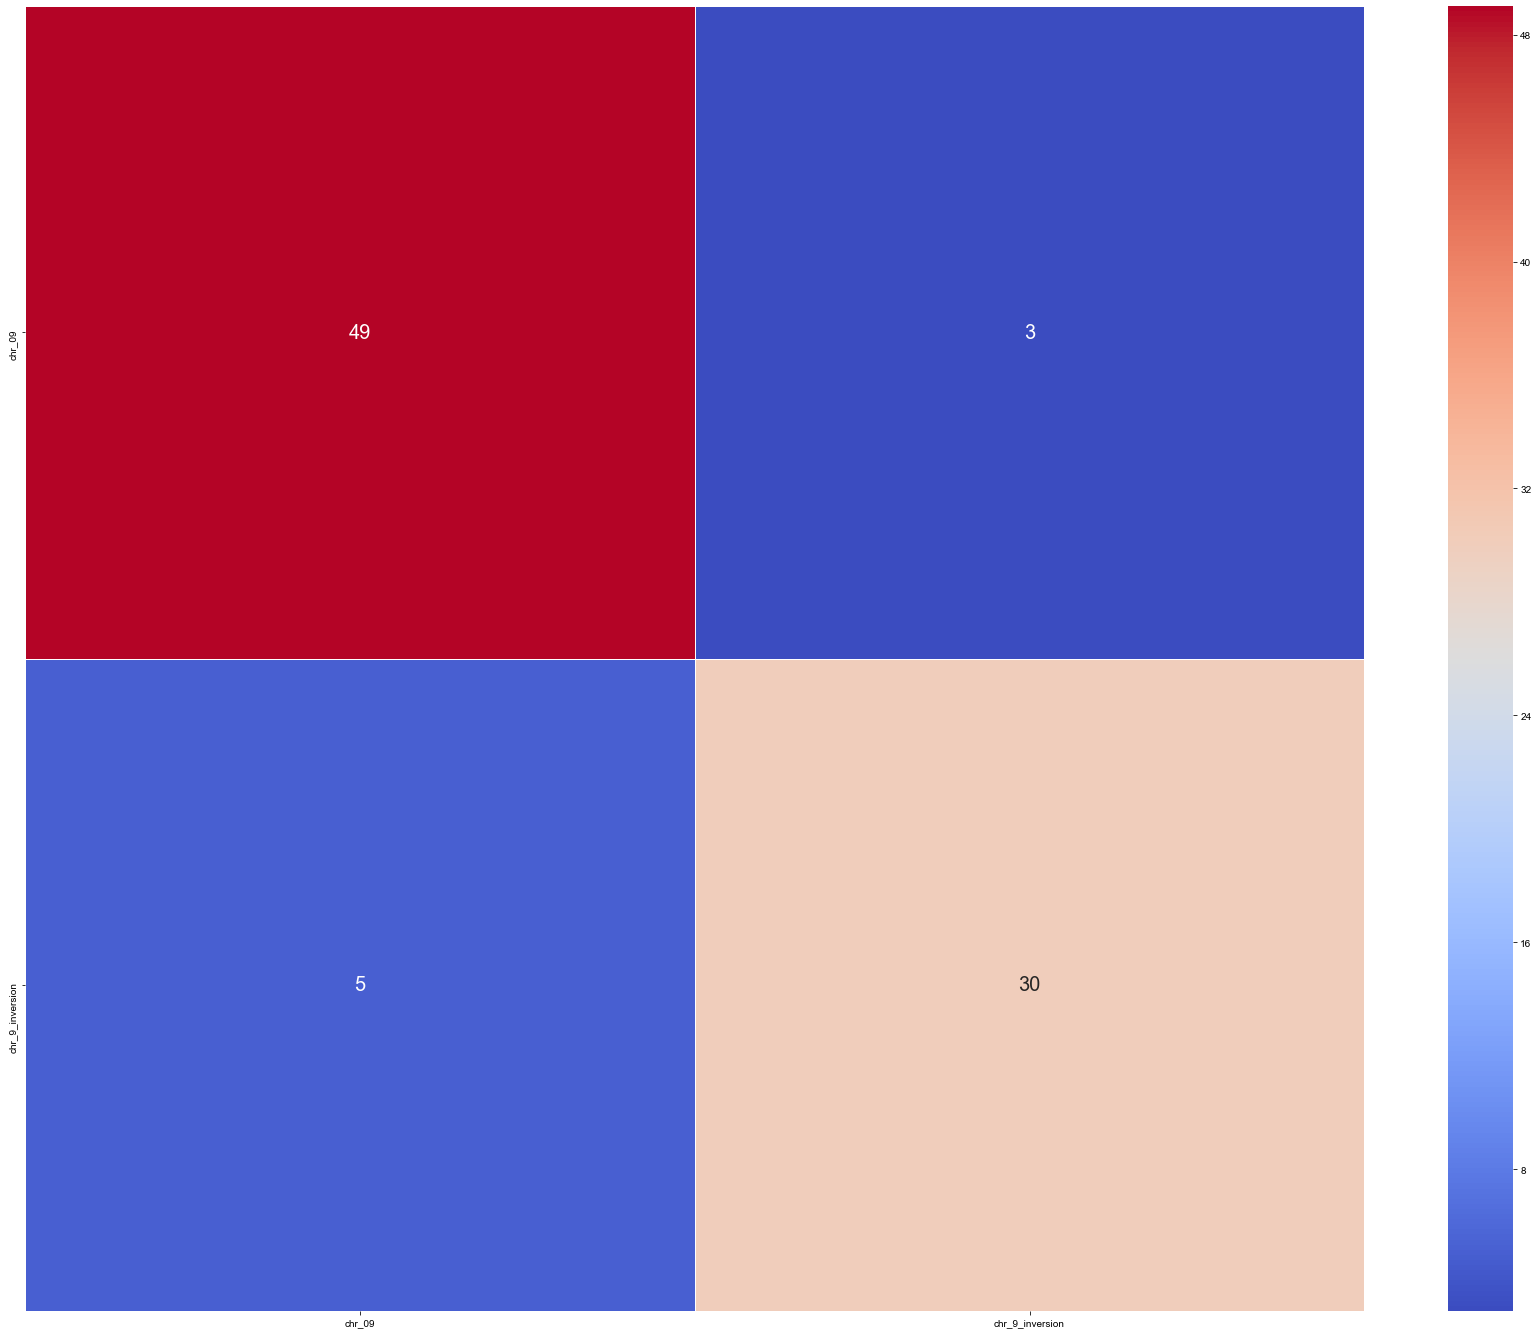

In [53]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [54]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_09_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [55]:
y_predict

array([[9.94767547e-01, 4.92231287e-02],
       [9.99768198e-01, 1.01504521e-02],
       [9.99999762e-01, 2.33776027e-05],
       [9.99999642e-01, 2.85238420e-05],
       [9.99999642e-01, 3.16678452e-05],
       [9.99999881e-01, 6.44154861e-05],
       [9.99997139e-01, 5.77330764e-04],
       [9.99999523e-01, 2.08868354e-04],
       [9.99609292e-01, 6.71222582e-02],
       [9.99950886e-01, 1.28241233e-03],
       [9.99999881e-01, 6.39999098e-06],
       [9.99977469e-01, 4.83482523e-04],
       [9.99999762e-01, 8.53876918e-05],
       [9.99986053e-01, 3.12830467e-04],
       [9.69070554e-01, 5.45362055e-01],
       [9.99999881e-01, 1.19360020e-05],
       [9.15438294e-01, 7.11423278e-01],
       [9.99999762e-01, 1.41359696e-05],
       [1.00000000e+00, 1.29277942e-06],
       [9.91543174e-01, 4.27371301e-02],
       [9.99999881e-01, 1.07563110e-05],
       [9.99901652e-01, 1.02019997e-03],
       [1.00000000e+00, 1.94970221e-06],
       [9.99999285e-01, 2.60280995e-05],
       [9.965026

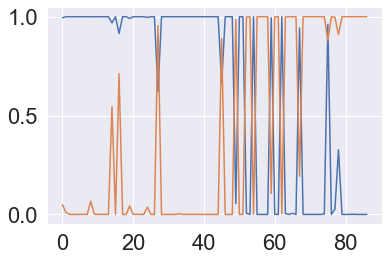

In [56]:
plt.plot(y_predict)

In [57]:
y_predict_1D = y_predict[:,0]

In [58]:
y_predict_1D_processed = 1- y_predict_1D

In [59]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [60]:
auc_rf

0.9796703296703296

In [61]:
x = y = np.arange(0,1.1,0.1)

In [62]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

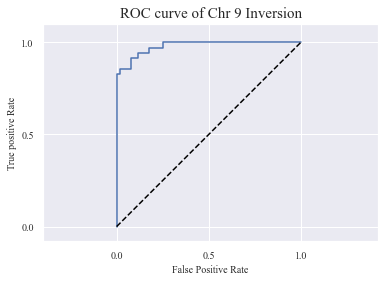

In [63]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr 9 Inversion', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_09_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [64]:
auc_value = auc(fpr, tpr)

In [65]:
print('AUC is ', auc_value)

AUC is  0.9796703296703296


# Results

In [66]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.908


In [67]:
print(performanceReport)

                 precision    recall  f1-score   support

         chr_09       0.91      0.94      0.92        52
chr_9_inversion       0.91      0.86      0.88        35

      micro avg       0.91      0.91      0.91        87
      macro avg       0.91      0.90      0.90        87
   weighted avg       0.91      0.91      0.91        87



In [68]:
type(performanceReport)

str

In [69]:
confusion

,chr_09,chr_9_inversion
chr_09,49,3
chr_9_inversion,5,30


In [70]:
print('AUC is ', auc_value)

AUC is  0.9796703296703296


## Export to a text file

In [71]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()